In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import warnings

In [75]:
import nltk

In [76]:
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

In [77]:
characters = pd.read_csv('simpsons_characters.csv', index_col='id').sort_index()
lines = pd.read_csv('simpsons_script_lines.csv', 
                    index_col='id', error_bad_lines=False).sort_index()

In [78]:
characters.head()

,name,normalized_name,gender
id,,,
1,Marge Simpson,marge simpson,f
2,Homer Simpson,homer simpson,m
3,Seymour Skinner,seymour skinner,m
4,JANEY,janey,f
5,Todd Flanders,todd flanders,m


In [79]:
#characters[characters['normalized_name'].str.contains('homer')][:30]
characters.loc[[125, 625, 1011, 1085, 2408], ['name']]

,name
id,
125,Homer's Canyon Echo
625,Homer-Ape
1011,Homer's Bloody Skull
1085,Evil Homer
2408,Homer's Stomach


In [80]:
lines.drop(['number', 'timestamp_in_ms', 'raw_text', 'normalized_text'], axis=1).head()

,episode_id,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,word_count
id,,,,,,,,
1,1,FALSE,NaN,1.0,NaN,Street,NaN,NaN
2,1,FALSE,NaN,2.0,NaN,Car,NaN,NaN
3,1,TRUE,1,2.0,Marge Simpson,Car,"Ooo, careful, Homer.",3
4,1,TRUE,2,2.0,Homer Simpson,Car,There's no time to be careful.,6
5,1,TRUE,2,2.0,Homer Simpson,Car,We're late.,2


In [81]:
lines.drop(['number', 'timestamp_in_ms', 'raw_text'], axis=1).groupby('raw_character_text').count().sort_values(by='normalized_text', ascending=False)[:10]

,episode_id,speaking_line,character_id,location_id,raw_location_text,spoken_words,normalized_text,word_count
raw_character_text,,,,,,,,
Homer Simpson,29842,29842,29842,29772,29772,27912,27909,27912
Marge Simpson,14159,14159,14159,14135,14135,13193,13191,13193
Bart Simpson,13777,13777,13777,13763,13763,13013,13011,13013
Lisa Simpson,11502,11502,11502,11485,11485,10769,10767,10769
C. Montgomery Burns,3172,3172,3172,3172,3172,3087,3086,3087
Moe Szyslak,2864,2864,2864,2862,2862,2810,2810,2810
Seymour Skinner,2443,2443,2443,2438,2438,2390,2390,2390
Ned Flanders,2145,2145,2145,2141,2141,2057,2056,2057
Grampa Simpson,1886,1886,1886,1881,1881,1807,1807,1807


In [82]:
lines.loc[(lines.raw_character_text == 'Homer Simpson') & (lines.word_count.isnull()), ['raw_text', 'raw_character_text', 'spoken_words']][:5]

,raw_text,raw_character_text,spoken_words
id,,,
123,Homer Simpson: (SHRIEKS),Homer Simpson,NaN
187,Homer Simpson: (SHUDDERS),Homer Simpson,NaN
324,Homer Simpson: (GROANS LIKE HE'S HAVING A HEAR...,Homer Simpson,NaN
328,Homer Simpson: (GROAN),Homer Simpson,NaN
612,Homer Simpson: (GRUNTS),Homer Simpson,NaN


In [83]:
top_50 = lines.groupby('raw_character_text')['raw_text'].count().sort_values(ascending=False)[:50]
top_50.to_csv('top_50.csv')

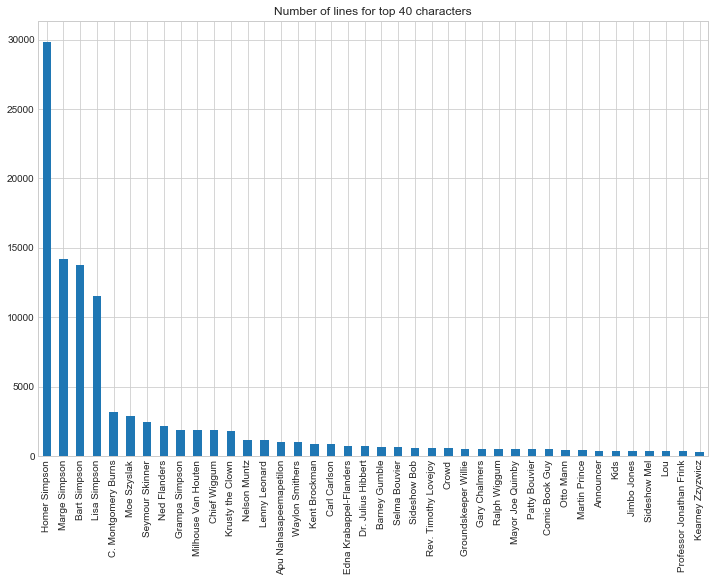

In [84]:
fig, ax = plt.subplots(figsize=(12, 8))
lines.groupby('raw_character_text')['raw_text'].count().sort_values(ascending=False)[:40].plot(kind='bar')
ax.set_title('Number of lines for top 40 characters')
ax.set_xlabel('');

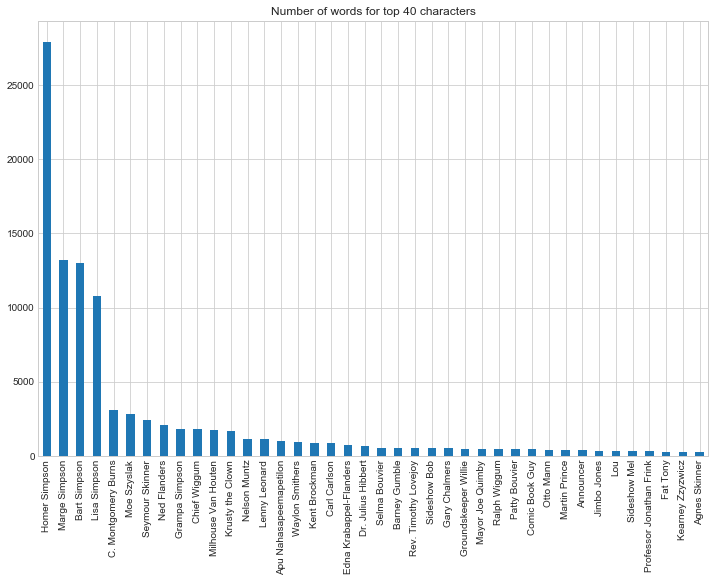

In [85]:
fig, ax = plt.subplots(figsize=(12, 8))
lines.groupby('raw_character_text')['word_count'].count().sort_values(ascending=False)[:40].plot(kind='bar')
ax.set_title('Number of words for top 40 characters')
ax.set_xlabel('');

In [86]:
from nltk.corpus import cmudict

In [87]:
from nltk.corpus import cmudict
prondict = cmudict.dict()

def numsyllables(word):
    try:
        pron = prondict[word][0]
        return len([s for s in pron if any([char.isdigit() for char in s])])
    except KeyError:
        return 1
    
def total_sylls(x):
    return sum([numsyllables(word) for word in x['normalized_text'].split(' ')])

In [88]:
lines['word_count'] = lines['word_count'].str.extract('(\d+)', expand=False)
lines = lines[lines.raw_character_text != 'Entire Town']
lines = lines[lines.raw_character_text != 'ABBA']
lines = lines[lines.raw_character_text != 'Robert Pinsky']
lines['word_count'].fillna(value=0, inplace=True)
lines['word_count'] = lines['word_count'].astype(str).astype(float)

In [89]:
lines['syllable count'] = lines.dropna(subset=['normalized_text']).apply(lambda x: total_sylls(x), axis=1)
lines['sentence count'] = lines.dropna(subset=['normalized_text'])['spoken_words'].str.count('\.')

In [90]:
counts = lines.groupby('raw_character_text')[['word_count', 'sentence count', 'syllable count']].sum()
counts = counts.sort_values(by='word_count', ascending=False)


,word_count,sentence count,syllable count
raw_character_text,,,
Marge Simpson,1269710.0,16695.0,160022.0
Homer Simpson,680208.0,41560.0,341088.0
Lisa Simpson,363224.0,12991.0,128741.0
Bart Simpson,217113.0,15703.0,136170.0
C. Montgomery Burns,36212.0,5003.0,47882.0


In [92]:
counts.head(20)

,word_count,sentence count,syllable count,Flesch readability,Flesch-Kincaid grade
raw_character_text,,,,,
Marge Simpson,1269710.0,16695.0,160022.0,118.978723,15.557949
Homer Simpson,680208.0,41560.0,341088.0,147.800222,-3.289842
Lisa Simpson,363224.0,12991.0,128741.0,148.470343,-0.503343
Bart Simpson,217113.0,15703.0,136170.0,139.741551,-2.796995
C. Montgomery Burns,36212.0,5003.0,47882.0,87.624426,2.835615
Moe Szyslak,32855.0,4676.0,40533.0,95.332831,1.707842
Seymour Skinner,28138.0,4154.0,38186.0,85.149262,3.065494
Ned Flanders,22909.0,3139.0,28872.0,92.806749,2.127722
Krusty the Clown,20701.0,2882.0,26217.0,92.401835,2.155550


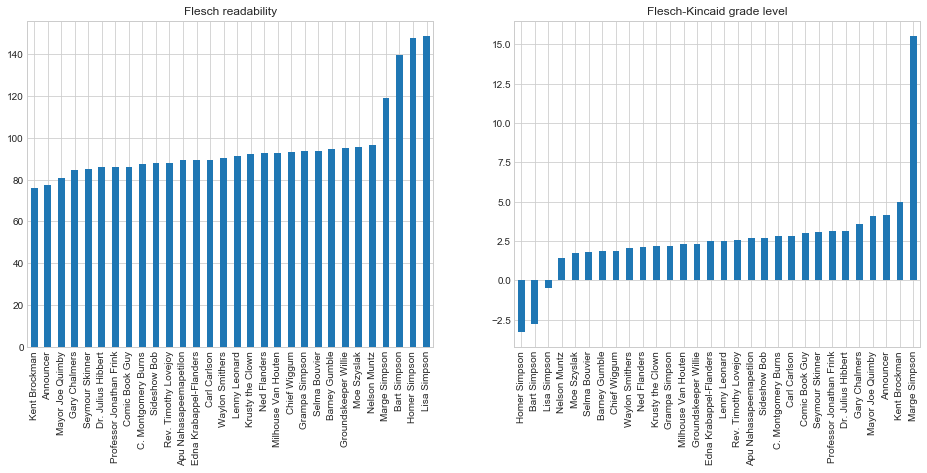

In [91]:
counts['Flesch readability'] = 206.835 - 1.015*counts['word_count']/counts['sentence count'] - 84.6*counts['syllable count']/counts['word_count']
counts['Flesch-Kincaid grade'] = 0.39*counts['word_count']/counts['sentence count'] + 11.8*counts['syllable count']/counts['word_count'] - 15.59

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
counts['Flesch readability'][:30].sort_values().plot(kind='bar', ax=ax[0])
ax[0].set_title('Flesch readability')
ax[0].set_xlabel('')
counts['Flesch-Kincaid grade'][:30].sort_values().plot(kind='bar', ax=ax[1])
ax[1].set_title('Flesch-Kincaid grade level')
ax[1].set_xlabel('');

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

all_speech = lines.dropna(subset=['normalized_text']).groupby('raw_character_text')['spoken_words'].agg(' '.join)

stop_words = set(stopwords.words('english'))

def proc(x):
    tokenizer = RegexpTokenizer(r'\w+')
    #print(x)
    #print(sent_tokenize(x))
    #tokens = word_tokenize(sent_tokenize(x))
    return [word.lower() for word in tokenizer.tokenize(x) if word not in stop_words]

all_speech = pd.DataFrame(all_speech.apply(lambda x: proc(x)))

all_speech['total words'] = all_speech['spoken_words'].transform(len)
all_speech['vocab size'] = all_speech['spoken_words'].transform(lambda x: len(set(x)))
all_speech['vocab:total ratio'] = all_speech['vocab size'] / all_speech['total words']

all_speech.sort_values(by='total words', ascending=False, inplace=True)

all_speech.head(10)

In [ ]:
all_speech.sort_values(by='vocab size', ascending=False).head(10)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(all_speech['total words'], all_speech['vocab size'])
ax.set_xlabel('Total Words')
ax.set_ylabel('Vocab Size');

In [ ]:
fig, ax = plt.subplots()
ax.scatter(all_speech.loc[all_speech['total words']>500, 'total words'],
            all_speech.loc[all_speech['total words']>500, 'vocab:total ratio'])
ax.set_xlabel('Total Words')
ax.set_ylabel('Vocab:Total Ratio');

In [ ]:
all_speech['new vocab curve'] = all_speech.ix[:30, 'spoken_words'].apply(lambda x: [len(set(x[:i])) for i in range(min(len(x), 20000))])

colors = plt.cm.nipy_spectral(np.linspace(0, 1, 10))

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlabel('Total Words')
ax.set_ylabel('Unique Words')
for i in range(30):
    plt.plot(all_speech.ix[i, 'new vocab curve'], color=colors[i%10], label=str(all_speech.index[i]));
legend = ax.legend(fontsize='x-large', frameon=True, bbox_to_anchor=(1, 1));
legend.get_frame().set_facecolor('lightgrey')

In [ ]:
Homer_words = []
for j in range(10):
    Homer_words.append([len(set(all_speech.loc['Homer Simpson', 'spoken_words'][17500*j:17500*j+i])) for i in range(17500)])

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('Total Words')
ax.set_ylabel('Unique Words')
for i in range(len(Homer_words)):
    plt.plot(Homer_words[i], color=colors[i%10], label='Homer group '+str(i+1));
legend = ax.legend(fontsize='x-large', frameon=True, bbox_to_anchor=(1, 1));
legend.get_frame().set_facecolor('lightgrey')

In [ ]:
Marge_words = []
for j in range(5):
    Marge_words.append([len(set(all_speech.loc['Marge Simpson', 'spoken_words'][15000*j:15000*j+i])) for i in range(15000)])

colors = plt.cm.nipy_spectral(np.linspace(0, 1, 5))

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel('Total Words')
ax.set_ylabel('Unique Words')
for i in range(len(Marge_words)):
    plt.plot(Marge_words[i], color=colors[i%10], label='Marge group '+str(i+1));
legend = ax.legend(fontsize='x-large', frameon=True, bbox_to_anchor=(1, 1));
legend.get_frame().set_facecolor('lightgrey')

In [ ]:
Bart_words = []
for j in range(7):
    Bart_words.append([len(set(all_speech.loc['Bart Simpson', 'spoken_words'][10000*j:10000*j+i])) for i in range(10000)])
    
Lisa_words = []
for j in range(6):
    Lisa_words.append([len(set(all_speech.loc['Lisa Simpson', 'spoken_words'][10000*j:10000*j+i])) for i in range(10000)])

colors = plt.cm.nipy_spectral(np.linspace(0, 1, 7))

fig, ax = plt.subplots(2, 1, figsize=(8, 12))
ax[0].set_xlabel('Total Words')
ax[0].set_ylabel('Unique Words')
for i in range(len(Bart_words)):
    ax[0].plot(Bart_words[i], color=colors[i%10], label='Bart group '+str(i+1));
legend = ax[0].legend(fontsize='x-large', frameon=True, bbox_to_anchor=(1, 1));
legend.get_frame().set_facecolor('lightgrey')
ax[1].set_xlabel('Total Words')
ax[1].set_ylabel('Unique Words')
for i in range(len(Lisa_words)):
    ax[1].plot(Lisa_words[i], color=colors[i%10], label='Lisa group '+str(i+1));
legend = ax[1].legend(fontsize='x-large', frameon=True, bbox_to_anchor=(1, 1));
legend.get_frame().set_facecolor('lightgrey')